# Applying Machine Learning Algorithms:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
rcParams['figure.figsize'] = (8.0, 5.0)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_1 = pd.read_csv('Churn_Modelling_Wrangled.csv')

In [4]:
df_orig = pd.DataFrame(file_1)

In [5]:
df_orig.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [6]:
df = df_orig.copy()

In [7]:
# Dropping the id and name columns.
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null float64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null float64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null float64
HasCrCard          10000 non-null float64
IsActiveMember     10000 non-null float64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null float64
dtypes: float64(9), object(2)
memory usage: 859.5+ KB


In [9]:
# Converting NumOfProducts column to categorical.
df['NumOfProducts'] = df['NumOfProducts'].astype(int)
df['NumOfProducts'] = df['NumOfProducts'].astype(object)

In [10]:
# Creating seperate columns for categories
df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619.0,42.0,2.0,0.00,1.0,1.0,101348.88,1.0,1,0,0,1,0,1,0,0,0
1,608.0,41.0,1.0,83807.86,0.0,1.0,112542.58,0.0,0,0,1,1,0,1,0,0,0
2,502.0,42.0,8.0,159660.80,1.0,0.0,113931.57,1.0,1,0,0,1,0,0,0,1,0
3,699.0,39.0,1.0,0.00,0.0,0.0,93826.63,0.0,1,0,0,1,0,0,1,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,79084.10,0.0,0,0,1,1,0,1,0,0,0


In [11]:
# Dropping excess columns
df.drop('Geography_Spain', axis=1, inplace=True)
df.drop('Gender_Male', axis=1, inplace=True)
df.drop('NumOfProducts_2', axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female,NumOfProducts_1,NumOfProducts_3,NumOfProducts_4
0,619.0,42.0,2.0,0.00,1.0,1.0,101348.88,1.0,1,0,1,1,0,0
1,608.0,41.0,1.0,83807.86,0.0,1.0,112542.58,0.0,0,0,1,1,0,0
2,502.0,42.0,8.0,159660.80,1.0,0.0,113931.57,1.0,1,0,1,0,1,0
3,699.0,39.0,1.0,0.00,0.0,0.0,93826.63,0.0,1,0,1,0,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,79084.10,0.0,0,0,1,1,0,0


In [12]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [13]:
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited']] 

In [14]:
# Correlation Matrix
corr = df.corr()
corr.style.background_gradient()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
CreditScore,1,-0.00406036,0.000916799,0.00654961,-0.00585786,0.0266912,-0.00120802,0.0048971,-0.00907755,0.0026385,-0.0146635,0.00245258,-0.00476923,-0.0270847
Age,-0.00406036,1,-0.00956183,0.0282164,-0.0119417,0.0854115,-0.00805553,0.0468066,-0.0391663,0.0273788,0.0730471,0.0501181,0.0671801,0.285115
Tenure,0.000916799,-0.00956183,1,-0.0122041,0.0223277,-0.0283336,0.00778269,-0.00118804,-0.00274256,-0.0147186,-0.0129058,0.00773091,-0.00156324,-0.0135747
Balance,0.00654961,0.0282164,-0.0122041,1,-0.0145343,-0.00953465,0.012645,0.401498,-0.231197,-0.0120634,0.359684,0.0214855,-0.00311729,0.118645
HasCrCard,-0.00585786,-0.0119417,0.0223277,-0.0145343,1,-0.0122428,-0.00986156,0.0112732,0.00176931,-0.00515649,-0.00372404,-0.0038131,0.00271799,-0.006433
IsActiveMember,0.0266912,0.0854115,-0.0283336,-0.00953465,-0.0122428,1,-0.0115524,-0.0202706,0.00332721,-0.02308,-0.0221408,-0.00500066,-0.030656,-0.156309
EstimatedSalary,-0.00120802,-0.00805553,0.00778269,0.012645,-0.00986156,-0.0115524,1,0.0103944,-0.00341328,0.00821564,-0.0105707,0.00631647,0.0119394,0.0117731
Geography_Germany,0.0048971,0.0468066,-0.00118804,0.401498,0.0112732,-0.0202706,0.0103944,1,-0.58059,0.0247963,0.0348897,0.0266559,0.0408154,0.173245
Geography_France,-0.00907755,-0.0391663,-0.00274256,-0.231197,0.00176931,0.00332721,-0.00341328,-0.58059,1,-0.00701036,-0.0142429,-0.00277624,-0.0358843,-0.10502
Gender_Female,0.0026385,0.0273788,-0.0147186,-0.0120634,-0.00515649,-0.02308,0.00821564,0.0247963,-0.00701036,1,-0.0054732,0.0279201,0.0357417,0.106655


In [15]:
# Converting all Balances more than 0 to 1
df['Balance'] = df['Balance'].clip(upper=1)

In [16]:
# Dropping insignificant features as decided during previous excercises.
# Age p-value = 0.0
# Credit Score p-value = 0.0085
# Balance p-value = 0.0
# Estimated Salary p-value = 0.1222
df.drop('EstimatedSalary', axis=1, inplace=True)
df.drop('HasCrCard', axis=1, inplace=True)
#df.drop('NumOfProducts', axis=1, inplace=True)
df.drop('Tenure', axis=1, inplace=True)
df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,619.0,42.0,0.0,1.0,0,1,1,1,0,0,1.0
1,608.0,41.0,1.0,1.0,0,0,1,1,0,0,0.0
2,502.0,42.0,1.0,0.0,0,1,1,0,0,1,1.0
3,699.0,39.0,0.0,0.0,0,1,1,0,0,0,0.0
4,850.0,43.0,1.0,1.0,0,0,1,1,0,0,0.0


In [17]:
df = df.applymap(np.int64)

In [18]:
df.loc[df.Balance == 0, 'Balance'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.loc[df.Geography_Germany == 0, 'Geography_Germany'] = -1
df.loc[df.Geography_France == 0, 'Geography_France'] = -1
df.loc[df.Gender_Female == 0, 'Gender_Female'] = -1
df.loc[df.NumOfProducts_1 == 0, 'NumOfProducts_1'] = -1
df.loc[df.NumOfProducts_3 == 0, 'NumOfProducts_3'] = -1
df.loc[df.NumOfProducts_4 == 0, 'NumOfProducts_4'] = -1
df.loc[df.Exited == 0, 'Exited'] = -1
df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,619,42,-1,1,-1,1,1,1,-1,-1,1
1,608,41,1,1,-1,-1,1,1,-1,-1,-1
2,502,42,1,-1,-1,1,1,-1,-1,1,1
3,699,39,-1,-1,-1,1,1,-1,-1,-1,-1
4,850,43,1,1,-1,-1,1,1,-1,-1,-1


In [19]:
# Scaling the data
from sklearn.preprocessing import scale

df['CreditScore'] = scale(df['CreditScore'])
df['Age'] = scale(df['Age'])
#df['Tenure'] = scale(df['Tenure'])
#df['NumOfProducts'] = scale(df['NumOfProducts'])

df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,-0.326320,0.293823,-1,1,-1,1,1,1,-1,-1,1
1,-0.440154,0.198460,1,1,-1,-1,1,1,-1,-1,-1
2,-1.537099,0.293823,1,-1,-1,1,1,-1,-1,1,1
3,0.501564,0.007734,-1,-1,-1,1,1,-1,-1,-1,-1
4,2.064194,0.389186,1,1,-1,-1,1,1,-1,-1,-1


In [20]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited'],
      dtype='object')

In [21]:
X = df[['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3']]
y = df['Exited']

([<matplotlib.axis.XTick at 0x1f6942f4438>,
 <a list of 10 Text xticklabel objects>)

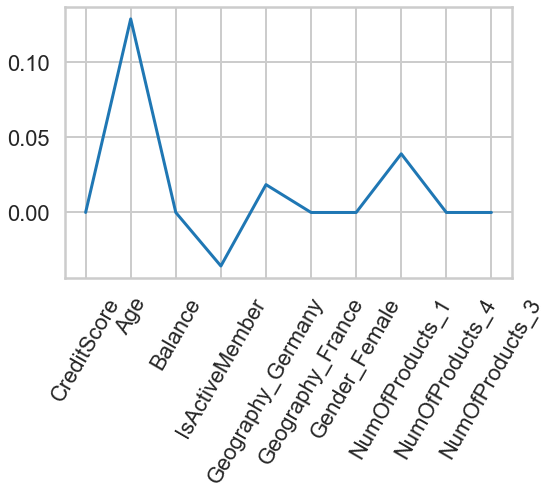

In [22]:
# Using Lasso to know features significance.
from sklearn.linear_model import Lasso
names = df.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)-1), lasso_coef)
plt.xticks(range(len(names)-1), names, rotation=60)

## Over Sampling

In [23]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [24]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [25]:
a = pd.Series(y_sm)
a.value_counts()

-1    7964
 1    7964
dtype: int64

In [26]:
#from imblearn.combine import SMOTETomek

#smt = SMOTETomek(ratio='auto')
#X_smt, y_smt = smt.fit_sample(X, y)

# Applying:

In [26]:
# Splitting the data in test data and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=51)

In [27]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Logistic Regression:

In [29]:
# Fitting the data

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
accuracy_score(y_pred, y_test)

0.751412429378531

In [43]:
abc = X.iloc[2121:2123]
abc

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3
2121,0.211805,-0.850534,-1,1,-1,1,-1,1,-1,-1
2122,1.184568,-0.659808,1,-1,-1,-1,1,1,-1,-1


In [45]:
y_pred = logreg.predict(abc)
y_pred

array([-1,  1], dtype=int64)

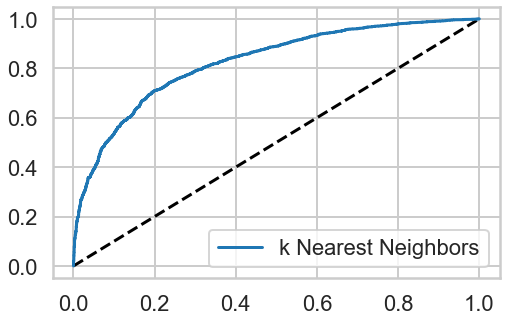

In [31]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='k Nearest Neighbors')
plt.legend()

In [33]:
roc_auc_score(y_test, y_pred_prob)

0.8316440398017968

In [34]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.75      0.75      0.75      2369
           1       0.76      0.75      0.75      2410

    accuracy                           0.75      4779
   macro avg       0.75      0.75      0.75      4779
weighted avg       0.75      0.75      0.75      4779



## kNN:

In [46]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')
knn.fit(X_train,y_train)
accuracy_score(knn.predict(X_test), y_test)

0.7930529399455953

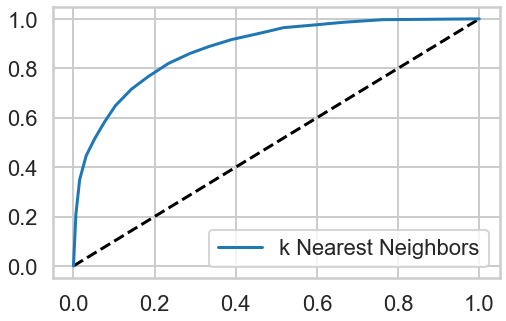

In [47]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='k Nearest Neighbors')
plt.legend()

In [48]:
roc_auc_score(y_test, y_pred_prob)

0.8801801099611336

In [49]:
print(confusion_matrix(y_test, knn.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[1815  554]
 [ 435 1975]]


In [50]:
y_pred = knn.predict(abc)
y_pred

array([-1, -1], dtype=int64)

In [39]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.81      0.77      0.79      2369
           1       0.78      0.82      0.80      2410

    accuracy                           0.80      4779
   macro avg       0.80      0.79      0.79      4779
weighted avg       0.80      0.80      0.80      4779



## SVM with 'rbf' Kernal:

In [67]:
svm_rbf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svm_rbf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [68]:
y_pred = svm_rbf.predict(abc)
y_pred

array([-1, -1], dtype=int64)

In [41]:
y_pred = svm_rbf.predict(X_test)
accuracy_score(y_pred, y_test)

0.7748482946223059

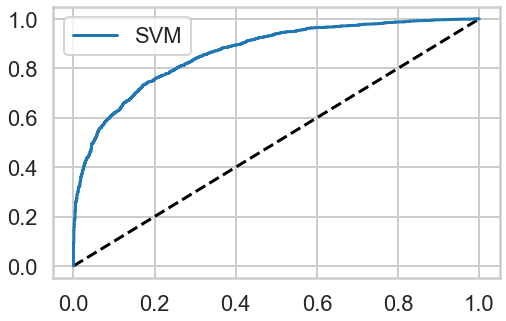

In [42]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [43]:
roc_auc_score(y_test, y_pred_prob)

0.8642440653741533

In [44]:
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[1832  537]
 [ 539 1871]]


In [45]:
print(classification_report(y_test, svm_rbf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.77      0.77      0.77      2369
           1       0.78      0.78      0.78      2410

    accuracy                           0.77      4779
   macro avg       0.77      0.77      0.77      4779
weighted avg       0.77      0.77      0.77      4779



## SVM with 'poly' Kernal

In [46]:
from sklearn.svm import SVC

SVM_poly_cv = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM_poly_cv.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

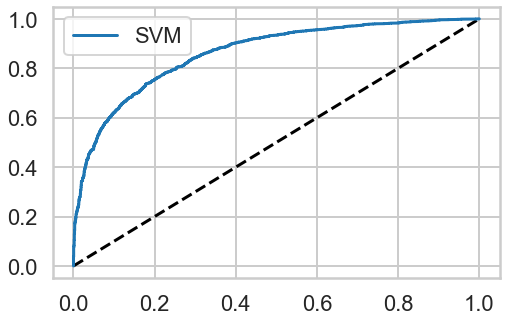

In [47]:
y_pred_prob = SVM_poly_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [48]:
roc_auc_score(y_test, y_pred_prob)

0.8617699398699312

In [49]:
print(confusion_matrix(y_test, SVM_poly_cv.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[1864  505]
 [ 564 1846]]


In [50]:
print(classification_report(y_test, SVM_poly_cv.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78      2369
           1       0.79      0.77      0.78      2410

    accuracy                           0.78      4779
   macro avg       0.78      0.78      0.78      4779
weighted avg       0.78      0.78      0.78      4779



## Random Forest

In [64]:
RF_cv = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=155, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RF_cv.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=155,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

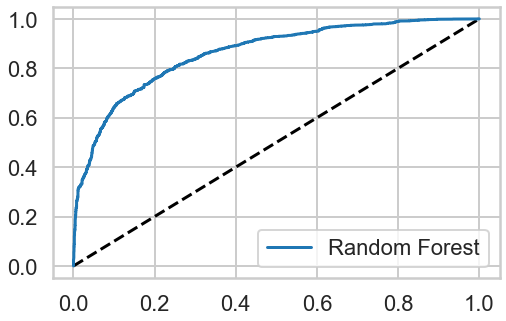

In [65]:
y_pred_prob = RF_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.legend()

In [66]:
y_pred = RF_cv.predict(abc)
y_pred

array([-1, -1], dtype=int64)

In [53]:
roc_auc_score(y_test, y_pred_prob)

0.8644896300590792

In [54]:
print(confusion_matrix(y_test, RF_cv.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[1895  474]
 [ 566 1844]]


In [55]:
print(classification_report(y_test, RF_cv.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.77      0.80      0.78      2369
           1       0.80      0.77      0.78      2410

    accuracy                           0.78      4779
   macro avg       0.78      0.78      0.78      4779
weighted avg       0.78      0.78      0.78      4779



## Extreme Gradient boosting:

In [51]:
xgb_cv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.001,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_cv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

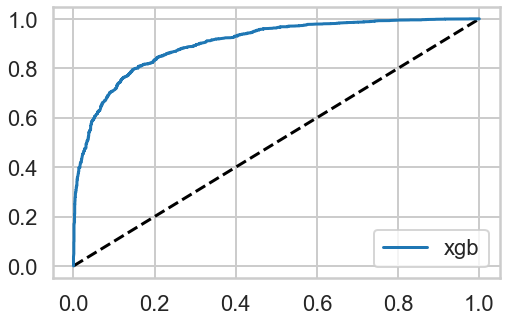

In [52]:
y_pred_prob = xgb_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='xgb')
plt.legend()

In [53]:
roc_auc_score(y_test, y_pred_prob)

0.9012172266604078

In [54]:
y_pred = logreg.predict(abc)
y_pred

array([-1,  1], dtype=int64)

In [59]:
print(confusion_matrix(y_test, xgb_cv.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[1995  374]
 [ 426 1984]]


In [60]:
print(classification_report(y_test, xgb_cv.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83      2369
           1       0.84      0.82      0.83      2410

    accuracy                           0.83      4779
   macro avg       0.83      0.83      0.83      4779
weighted avg       0.83      0.83      0.83      4779



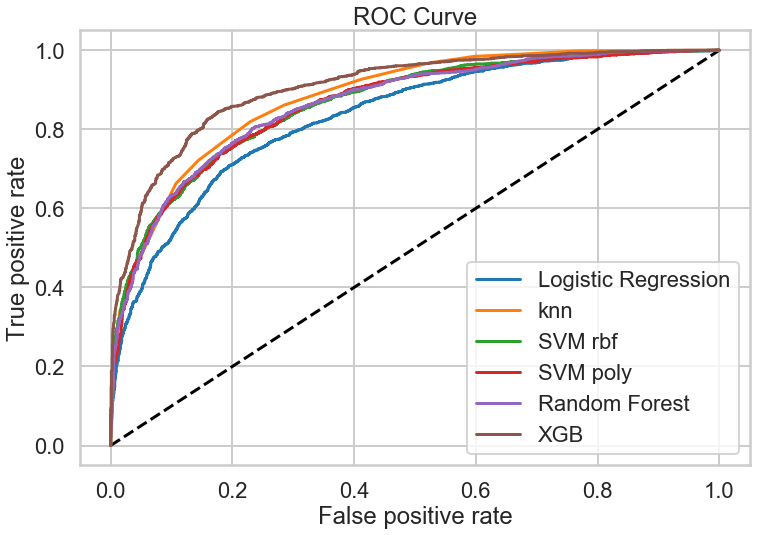

In [64]:
algos = [logreg, knn, svm_rbf, SVM_poly_cv, RF_cv, xgb_cv]
labels = ['Logistic Regression', 'knn', 'SVM rbf', 'SVM poly', 'Random Forest', 'XGB']

plt.figure(figsize = (12,8))
plt.plot([0,1], [0,1], 'k--')

for i in range(len(algos)):
    y_pred_prob = algos[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=labels[i])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')

In [55]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [56]:
estimators = []

model1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=155, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

estimators.append(('r_forest', model1))

model2 = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

estimators.append(('svm', model2))

model3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.001,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

estimators.append(('xgb', model3))

In [57]:
estimators

[('r_forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=5, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=11,
                         min_weight_fraction_leaf=0.0, n_estimators=155,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)),
 ('svm', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0.001,
                learning_rate=0.05, max_delta_step=0, max_depth=5,
                min_ch

In [58]:
ensemble = VotingClassifier(estimators, voting='hard')

In [59]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('r_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=11,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=155,
                                                     n_jobs=None,
      

In [ ]:
#results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

In [ ]:
#results.mean()

In [61]:
ensemble.score(X_test, y_test)

0.8037246285833857

In [62]:
roc_auc_score(y_test, y_pred_prob)

0.9012172266604078

In [63]:
print(classification_report(y_test, ensemble.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.79      0.82      0.81      2369
           1       0.82      0.79      0.80      2410

    accuracy                           0.80      4779
   macro avg       0.80      0.80      0.80      4779
weighted avg       0.80      0.80      0.80      4779

